In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


from sklearn.model_selection import train_test_split, GridSearchCV,\
                                    cross_val_score, cross_validate

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score

# Classification

Classification을 위한 예제 데이터 셋 로드 함수

In [6]:
import gdown
import os
def get_human_dataset():

    google_path = 'https://drive.google.com/uc?id='
    file_id_train = '16dVeNybWyjHnucmeIuLtzfdX2qFZSUEG'
    file_id_test = '1WFAOJNz8Ovj2olAHB_TvSHbjUN-zDIQU'

    gdown.download(google_path+file_id_train,'human_train.csv',quiet=False)
    gdown.download(google_path+file_id_test,'human_test.csv',quiet=False)
    
    X_train = pd.read_csv('human_train.csv')
    X_test = pd.read_csv('human_test.csv')
    y_train = X_train.iloc[:,-1]
    y_test = X_test.iloc[:, -1]
    X_train = X_train.iloc[:,:-1]
    X_test = X_test.iloc[:,:-1]
    
    os.remove('human_train.csv')
    os.remove('human_test.csv')
    
    return X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = get_human_dataset()

Downloading...
From: https://drive.google.com/uc?id=16dVeNybWyjHnucmeIuLtzfdX2qFZSUEG
To: C:\Users\N\OneDrive\WorkJ\Data_A C V\Data_Visualization\human_train.csv
48.1MB [00:02, 16.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WFAOJNz8Ovj2olAHB_TvSHbjUN-zDIQU
To: C:\Users\N\OneDrive\WorkJ\Data_A C V\Data_Visualization\human_test.csv
19.3MB [00:01, 14.6MB/s]


## GridSearch 시각화

GridSearch 결과 df로 만들어서 보여주기

In [12]:
estimator = Pipeline([('scaler', MinMaxScaler()),
                      ('model',LogisticRegression())])

param_grid = {'model__solver':  ['liblinear'],
              'model__penalty': ['l1', 'l2', 'elasticnet', 'none']
              }
grid_cv = GridSearchCV(estimator=estimator,
                       param_grid=param_grid,
                       cv=5,
                       n_jobs=-1)
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'model__solver': ['liblinear']})

In [14]:
grid_cv.best_params_

{'model__penalty': 'l1', 'model__solver': 'liblinear'}

In [17]:
df = pd.DataFrame(grid_cv.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__penalty,param_model__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,13.977748,1.244558,0.065816,0.004263,l1,liblinear,"{'model__penalty': 'l1', 'model__solver': 'lib...",0.917743,0.908226,0.931973,0.957823,0.963265,0.935806,0.021635,1
1,15.509900,4.549011,0.033007,0.011666,l2,liblinear,"{'model__penalty': 'l2', 'model__solver': 'lib...",0.925221,0.885112,0.935374,0.959864,0.955102,0.932135,0.026705,2
2,0.265658,0.014627,0.000000,0.000000,elasticnet,liblinear,"{'model__penalty': 'elasticnet', 'model__solve...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,0.288664,0.009563,0.000000,0.000000,none,liblinear,"{'model__penalty': 'none', 'model__solver': 'l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [21]:
df.sort_values('rank_test_score')[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model__penalty': 'l1', 'model__solver': 'lib...",0.935806,1
1,"{'model__penalty': 'l2', 'model__solver': 'lib...",0.932135,2
2,"{'model__penalty': 'elasticnet', 'model__solve...",NaN,3
3,"{'model__penalty': 'none', 'model__solver': 'l...",NaN,4


## Decision Tree 계열

### Tree 시각화


### Feature importance 시각화

* 데이타셋 : human_dataset() 
* 알고리즘 : random_forest()

In [3]:
def get_human_dataset():
    import gdown
    import os
    google_path = 'https://drive.google.com/uc?id='
    file_id_train = '16dVeNybWyjHnucmeIuLtzfdX2qFZSUEG'
    file_id_test = '1WFAOJNz8Ovj2olAHB_TvSHbjUN-zDIQU'

    gdown.download(google_path+file_id_train,'human_train.csv',quiet=False)
    gdown.download(google_path+file_id_test,'human_test.csv',quiet=False)
    
    X_train = pd.read_csv('human_train.csv')
    X_test = pd.read_csv('human_test.csv')
    y_train = X_train.iloc[:,-1]
    y_test = X_test.iloc[:, -1]
    X_train = X_train.iloc[:,:-1]
    X_test = X_test.iloc[:,:-1]
    
    os.remove('human_train.csv')
    os.remove('human_test.csv')
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

Downloading...
From: https://drive.google.com/uc?id=16dVeNybWyjHnucmeIuLtzfdX2qFZSUEG
To: C:\Users\bigne\OneDrive\WorkJ\Data_A C V\Data_Visualization\human_train.csv
48.1MB [00:01, 28.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WFAOJNz8Ovj2olAHB_TvSHbjUN-zDIQU
To: C:\Users\bigne\OneDrive\WorkJ\Data_A C V\Data_Visualization\human_test.csv
19.3MB [00:01, 15.0MB/s]


In [6]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth= 12, min_samples_leaf= 8, 
                                min_samples_split=16, n_estimators=100)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=8, min_samples_split=16)

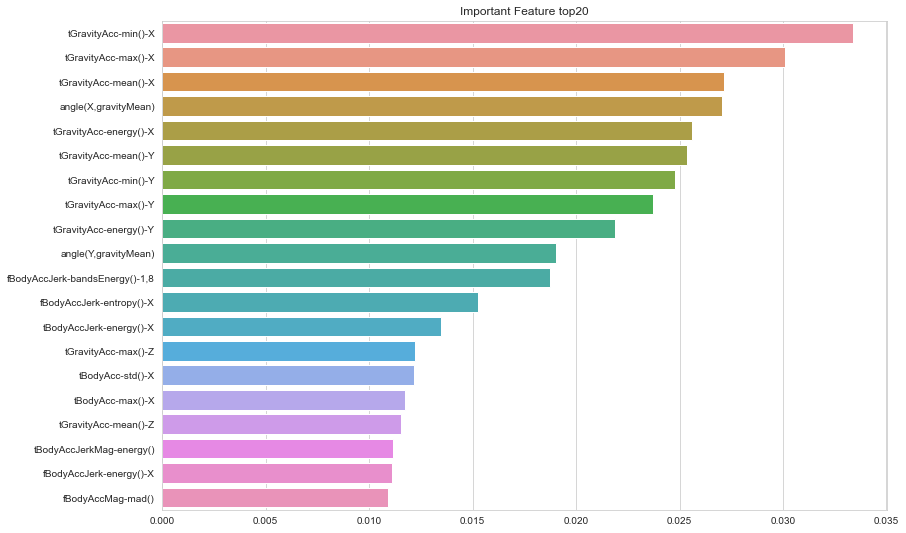

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

best_feature = pd.Series(rf_clf.feature_importances_, index = X_train.columns) # 시리즈로 변환해서 인덱스 명을 컬럼명으로 지정하기
best_f_top20 = best_feature.sort_values(ascending=False)[:20]

plt.figure(figsize=(13, 9))
sns.barplot(x=best_f_top20, y = best_f_top20.index)
plt.title('Important Feature top20')
plt.show();

## Logistic Regresioon

In [22]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg_clf = LogisticRegression()
lg_clf.fit(X_train_trans, y_train)

In [34]:
pred  = lg_clf.predict(X_test_trans)
accuracy_score(y_test, pred)

0.9507974211062097

In [31]:
print(lg_clf.coef_.shape)
feature_coef = lg_clf.coef_
feature_coef

(6, 562)


array([[-0.09113878,  0.04018877,  0.15092252, ..., -0.84970377,
        -0.11360945, -0.25862759],
       [-0.10006239,  0.03382363, -0.0716371 , ..., -1.38160484,
        -0.31664213,  0.17983631],
       [ 0.16528024,  0.04975385,  0.07644656, ...,  2.02391419,
         0.38049949, -0.49800077],
       [-0.13102564, -0.11711594, -0.06148916, ..., -0.2015836 ,
         0.01701494,  0.03333899],
       [ 0.28470002,  0.098551  ,  0.11493582, ..., -0.42465551,
        -0.21682907,  0.43781165],
       [-0.12775345, -0.10520131, -0.20917864, ...,  0.83363353,
         0.24956621,  0.10564142]])

In [26]:
lg_clf.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [39]:
df_feature_coef = pd.DataFrame(feature_coef.T, columns=lg_clf.classes_.tolist(), index = X_train.columns.tolist())

In [40]:
df_feature_coef

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
tBodyAcc-mean()-X,-0.091139,-0.100062,0.165280,-0.131026,0.284700,-0.127753
tBodyAcc-mean()-Y,0.040189,0.033824,0.049754,-0.117116,0.098551,-0.105201
tBodyAcc-mean()-Z,0.150923,-0.071637,0.076447,-0.061489,0.114936,-0.209179
tBodyAcc-std()-X,0.015179,-0.271712,-0.166451,-0.537787,0.553616,0.407154
tBodyAcc-std()-Y,-0.039847,0.005064,-0.299639,0.320528,-0.281580,0.295474
...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",0.132279,-0.157497,0.244528,-0.131290,0.018739,-0.106759
"angle(X,gravityMean)",2.333570,-1.077967,-0.893978,-0.384523,-0.512459,0.535358
"angle(Y,gravityMean)",-0.849704,-1.381605,2.023914,-0.201584,-0.424656,0.833634
"angle(Z,gravityMean)",-0.113609,-0.316642,0.380499,0.017015,-0.216829,0.249566


왜 계수에 e승을 해주어야 하는가?

참조: https://sefiks.com/2021/01/06/feature-importance-in-logistic-regression/

In [41]:
import math
df_importance = df_feature_coef.apply(lambda x : pow(math.e, x))
df_importance

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
tBodyAcc-mean()-X,0.912891,0.904781,1.179724,0.877195,1.329363,0.880070
tBodyAcc-mean()-Y,1.041007,1.034402,1.051012,0.889482,1.103571,0.900143
tBodyAcc-mean()-Z,1.162907,0.930869,1.079445,0.940363,1.121801,0.811250
tBodyAcc-std()-X,1.015295,0.762074,0.846665,0.584039,1.739532,1.502536
tBodyAcc-std()-Y,0.960937,1.005077,0.741086,1.377856,0.754590,1.343763
...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",1.141427,0.854280,1.277018,0.876964,1.018915,0.898742
"angle(X,gravityMean)",10.314695,0.340287,0.409025,0.680776,0.599021,1.708059
"angle(Y,gravityMean)",0.427542,0.251175,7.567889,0.817435,0.653995,2.301667
"angle(Z,gravityMean)",0.892606,0.728591,1.463015,1.017161,0.805068,1.283469


In [59]:
df_importance['Mean'] = df_importance.mean(axis=1)
df_importance

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,Mean
tBodyAcc-mean()-X,0.912891,0.904781,1.179724,0.877195,1.329363,0.880070,1.014004
tBodyAcc-mean()-Y,1.041007,1.034402,1.051012,0.889482,1.103571,0.900143,1.003270
tBodyAcc-mean()-Z,1.162907,0.930869,1.079445,0.940363,1.121801,0.811250,1.007772
tBodyAcc-std()-X,1.015295,0.762074,0.846665,0.584039,1.739532,1.502536,1.075023
tBodyAcc-std()-Y,0.960937,1.005077,0.741086,1.377856,0.754590,1.343763,1.030551
...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",1.141427,0.854280,1.277018,0.876964,1.018915,0.898742,1.011224
"angle(X,gravityMean)",10.314695,0.340287,0.409025,0.680776,0.599021,1.708059,2.341977
"angle(Y,gravityMean)",0.427542,0.251175,7.567889,0.817435,0.653995,2.301667,2.003284
"angle(Z,gravityMean)",0.892606,0.728591,1.463015,1.017161,0.805068,1.283469,1.031652


In [47]:
df_importance['LAYING'].sort_values(ascending=False).head(6)

angle(X,gravityMean)      10.314695
tGravityAcc-energy()-Y     6.580907
tGravityAcc-energy()-Z     3.656848
tGravityAcc-max()-Y        2.814035
tGravityAcc-mean()-Y       2.733979
tGravityAcc-min()-Y        2.619537
Name: LAYING, dtype: float64

LAYING
SITTING
STANDING
WALKING
WALKING_DOWNSTAIRS
WALKING_UPSTAIRS
Mean


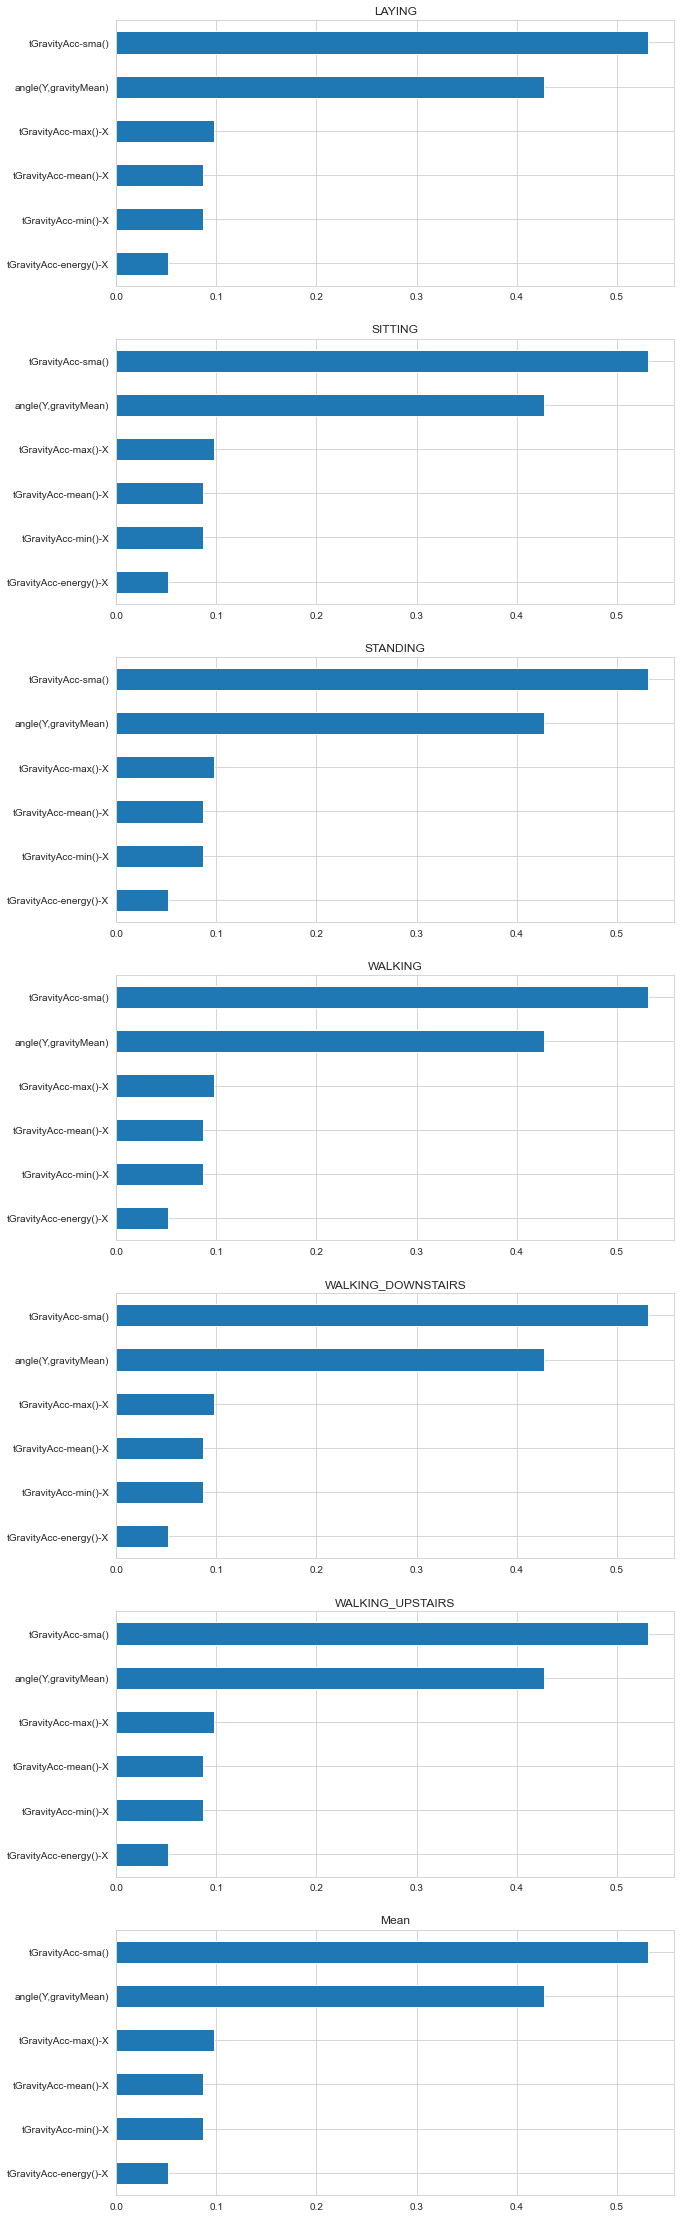

In [70]:
i = 1
plt.figure(figsize=(10,40))
for col in df_importance.columns:
    print(col)
    
    df_temp = df_importance['LAYING'].sort_values().head(6)
    
    
    plt.subplot(710+i)
    df_temp.plot.barh()
    plt.title(col)
    
    i += 1
    

<AxesSubplot:>

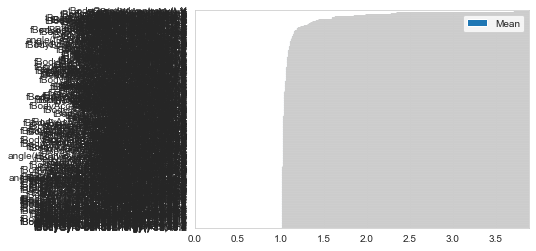

In [67]:
df_import_mean = df_importance[['Mean']]
df_import_mean.sort_values('Mean').plot.barh()

# Regression

## Regression 실재 값과 예측 값 시각화

In [1]:
def plot_reg_result(expected, predicted):
    range_ = [min(predicted.min(),expected.min()), max(predicted.max(), expected.max())]
    plt.figure(figsize=(8, 4))
    plt.scatter(expected, predicted)
    plt.plot(range_, range_, 'r--')
    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')
    plt.tight_layout()

## Coef_ 시각화

In [2]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index);

NameError: name 'pd' is not defined

In [ ]:
def get_top_bottom_coef(model, n=10):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명.
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

In [ ]:
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize=(24, 10), nrows = max(len(models)//3, 1) , ncols = 3)
    fig.tight_layout()
    for i, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        axs[i].set_title(model.__class__.__name__ + 'Coeffiecents', size=25)
        axs[i].tick_params(axis='y', direction='in', pad=-120)
        for label in (axs[i].get_xticklabels() + axs[i].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax = axs[i])

# Clustering

## make_blobs()의 결과 표시및 비교

In [1]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

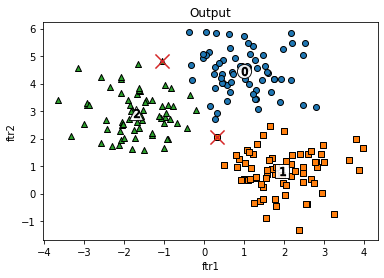

In [4]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    # 각각의 label 별 구분
    label_cluster = cluster_df[cluster_df['kmeans_label']==label]
    center_x_y = centers[label]
    
    # 구분 점 표시
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k',
                marker=markers[label])
    
    # 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolors='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                edgecolors='k', marker='$%d$'%label)

# 실제값과 군집값이 다른 곳 표시
miss_point = cluster_df[cluster_df['target'] != cluster_df['kmeans_label']]
plt.scatter(x=miss_point['ftr1'], y=miss_point['ftr2'], edgecolors='k', marker='x', s=200)

plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.title('Output')
plt.show()

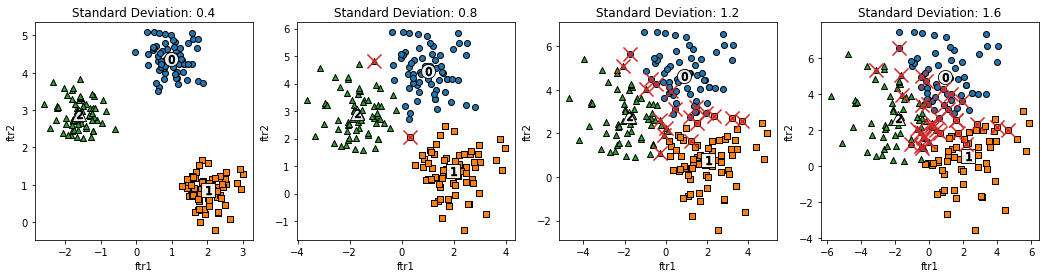

In [3]:
std_list = [0.4, 0.8, 1.2, 1.6]
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

fig, axs = plt.subplots(figsize=(18, 4), nrows=1, ncols=len(std_list))
for pos, std in enumerate(std_list):
    X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=std, random_state=0)
    cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
    cluster_df['target'] = y
    kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    cluster_df['kmeans_label'] = cluster_labels
    centers = kmeans.cluster_centers_
    unique_labels = np.unique(cluster_labels)

    
    for label in unique_labels:
        # 각각의 label 별 구분
        label_cluster = cluster_df[cluster_df['kmeans_label']==label]
        center_x_y = centers[label]

        # 구분 점 표시
        axs[pos].scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k',
                    marker=markers[label])

        # 중심 위치 좌표 시각화
        axs[pos].scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                    alpha=0.9, edgecolors='k', marker=markers[label])
        axs[pos].scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                    edgecolors='k', marker='$%d$'%label)

    # 실제값과 군집값이 다른 곳 표시
    miss_point = cluster_df[cluster_df['target'] != cluster_df['kmeans_label']]
    axs[pos].scatter(x=miss_point['ftr1'], y=miss_point['ftr2'], edgecolors='k', marker='x', s=200)

    axs[pos].set_xlabel('ftr1')
    axs[pos].set_ylabel('ftr2')
    axs[pos].set_title('Standard Deviation: {}'.format(std))
    
plt.show()